## Observations and Insights 

In [113]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on= "Mouse ID")

# Display the data table for preview
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [114]:
clean_df.to_excel("output.xls")

C:\Users\mahajanp\AppData\Local\Temp/ipykernel_28644/3019029666.py:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  clean_df.to_excel("output.xls")


In [115]:
# Checking the number of mice.
mouse_id_count = len(merge_df["Mouse ID"].unique())
print("Unique mice: " + str(mouse_id_count))

Unique mice: 249


In [116]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_data = merge_df[merge_df.duplicated(["Mouse ID", "Timepoint"], keep="last")]

In [117]:
duplicate_mouseID = duplicate_data["Mouse ID"].values[0]
duplicate_mouseID

'g989'

In [118]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
912,g989,Propriva,Female,21,26,10,51.745156,0
914,g989,Propriva,Female,21,26,15,51.325852,1
916,g989,Propriva,Female,21,26,20,55.326122,1


In [119]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_df[merge_df["Mouse ID"].str.contains("g989")==False]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [120]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_id_count = len(clean_df["Mouse ID"].unique())
print("Unique mice: " + str(clean_mouse_id_count))

Unique mice: 248


## Summary Statistics

In [121]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
mean = clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
median = clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
variance = clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
std_dev = clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
sem = clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()
 
# Assemble the resulting series into a single summary dataframe.
#use pd.DataFrame with dictionary
summary = pd.DataFrame({"Mean": mean,
                       "Median": median,
                        "Variance": variance,
                       "Standard Deviation": std_dev,
                        "SEM": sem})
summary

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [122]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

#clean_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ["mean", "median", "var","std_dev", "sem"]})

## Bar and Pie Charts

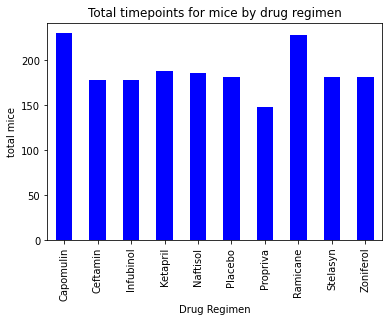

In [123]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drug_df = clean_df.groupby(['Drug Regimen'])["Timepoint"].count()

drug_df.plot(kind="bar", color="blue", title="Total timepoints for mice by drug regimen")
plt.ylabel("total mice")
plt.xlabel("Drug Regimen")
plt.show()


In [126]:
drug_df.reset_index()

,index,Drug Regimen,Timepoint
0,0,Capomulin,230
1,1,Ceftamin,178
2,2,Infubinol,178
3,3,Ketapril,188
4,4,Naftisol,186
5,5,Placebo,181
6,6,Propriva,148
7,7,Ramicane,228
8,8,Stelasyn,181
9,9,Zoniferol,182


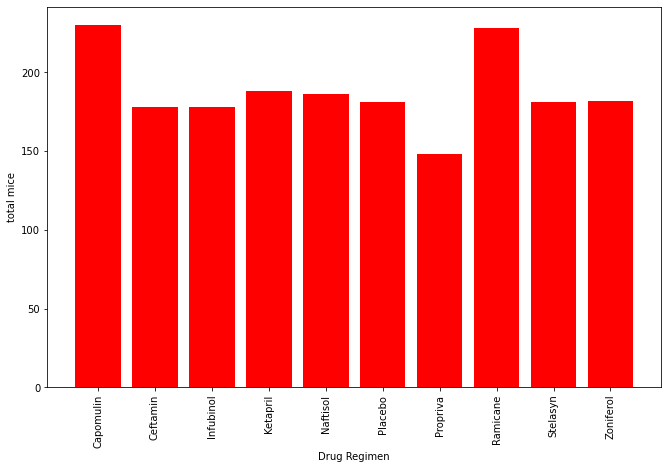

In [128]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drug_df = drug_df.reset_index()
x_axis = drug_df["Drug Regimen"]
y_axis = drug_df["Timepoint"]

fig1, ax1 = plt.subplots(figsize=(11,7))
plt.bar(x_axis, y_axis, color = "red", align = "center")
plt.ylabel("total mice")
plt.xlabel("Drug Regimen")
plt.xticks(rotation = 90)
plt.show()


<AxesSubplot:ylabel='Mouse ID'>

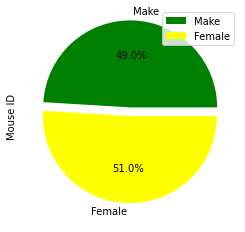

In [87]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_df = pd.DataFrame(clean_df.groupby(["Sex"])["Mouse ID"].count())
gender_df

colors = ["green", "yellow"]
labels = ["Make", "Female"]
explode = (0.1, 0)

gender_df.plot(kind="pie", y = "Mouse ID", explode = explode, labels=labels, colors=colors, autopct="%1.1f%%")

([<matplotlib.patches.Wedge at 0x1ad36bceb50>,
 [Text(0.036089469908307935, 1.1994571897995099, 'Make'),
  Text(-0.0330820140826155, -1.0995024239828841, 'Female')],
 [Text(0.02105219077984629, 0.6996833607163808, '49.0%'),
  Text(-0.018044734954153905, -0.5997285948997549, '51.0%')])

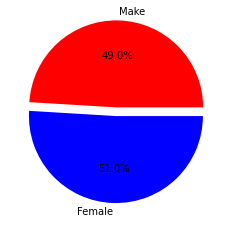

In [88]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_df = pd.DataFrame(clean_df.groupby(["Sex"])["Mouse ID"].count())
gender_df

colors = ["red", "blue"]
labels = ["Make", "Female"]
explode = (0.1, 0)

plt.pie(gender_df["Mouse ID"], explode = explode, labels=labels, colors=colors, autopct="%1.1f%%")


## Quartiles, Outliers and Boxplots

In [89]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint= clean_df.groupby(['Mouse ID'])["Timepoint"].max()
max_timepoint_df = pd.DataFrame(max_timepoint)


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_tumorvol_df = pd.merge(max_timepoint_df, clean_df, on=("Mouse ID", "Timepoint"))
final_tumorvol_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [90]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumorvol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for index in treatment_list:
    
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

IndentationError: expected an indented block (Temp/ipykernel_28644/2895633352.py, line 18)

In [91]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

Text(0.5, 1.0, 'Tumor volume vs. time point for s185 treated with Capomulin')

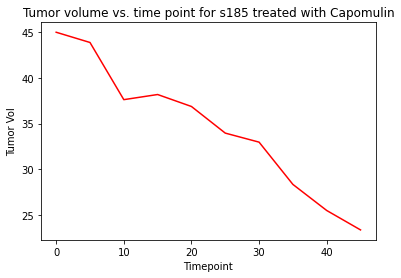

In [92]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

s185_data = clean_df.loc[clean_df["Mouse ID"] == "s185"]
s185_df = s185_data.loc[:, ["Timepoint", "Tumor Volume (mm3)"]]
s185_df

plt.plot(s185_df["Timepoint"], s185_df["Tumor Volume (mm3)"], color = "red")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Vol")
plt.title("Tumor volume vs. time point for s185 treated with Capomulin")


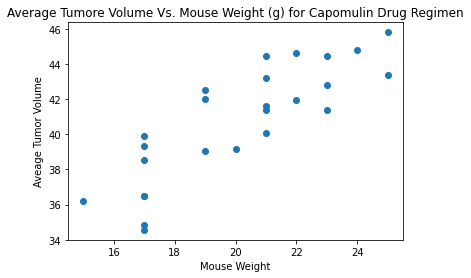

In [93]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#create subset df for capomulin only using loc and conditional 
#avg --> use mean function


capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
capomulin_tumorvol_avg = capomulin_df.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean().reset_index()
#capomulin_df["Tumor Vol Avg"] = ""
capomulin_tumorvol_avg

plt.scatter(capomulin_tumorvol_avg["Weight (g)"], capomulin_tumorvol_avg["Tumor Volume (mm3)"])
plt.xlabel("Mouse Weight")
plt.ylabel("Aveage Tumor Volume")
plt.title("Average Tumore Volume Vs. Mouse Weight (g) for Capomulin Drug Regimen")
plt.show()

## Correlation and Regression

In [94]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen <-- same cols as above

correlation = st.pearsonr( capomulin_tumorvol_avg["Tumor Volume (mm3)"], capomulin_tumorvol_avg["Weight (g)"])
correlation

(0.841936342469472, 1.3225722434712483e-07)

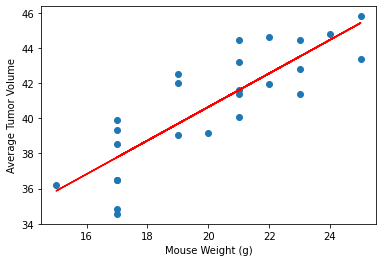

In [96]:
#linear regression model

x_value = capomulin_tumorvol_avg["Weight (g)"]
y_value = capomulin_tumorvol_avg["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_value,y_value)

plt.plot(x_value,regress_values,"r-")

plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume')
plt.show()